In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df = pd.read_csv("PROJECT.DIYA/cleaned_data.csv")

In [45]:
sns.set(style="whitegrid")

In [47]:
#1. Sales vs Profit by Sub-Category

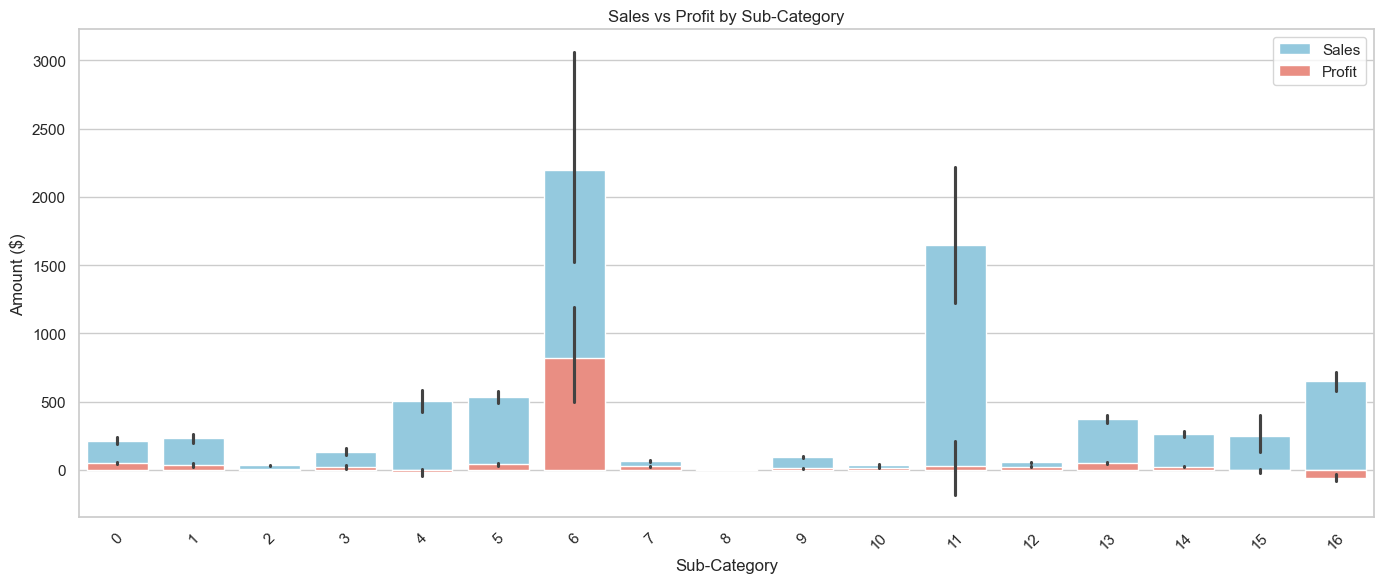

In [49]:
plt.figure(figsize=(14, 6))
sns.barplot(data=df, x='Sub-Category', y='Sales', color='skyblue', label='Sales')
sns.barplot(data=df, x='Sub-Category', y='Profit', color='salmon', label='Profit')

plt.xticks(rotation=45)
plt.title("Sales vs Profit by Sub-Category")
plt.ylabel("Amount ($)")
plt.legend()
plt.tight_layout()
plt.show()

In [50]:
#2. Top 10 States by Sales

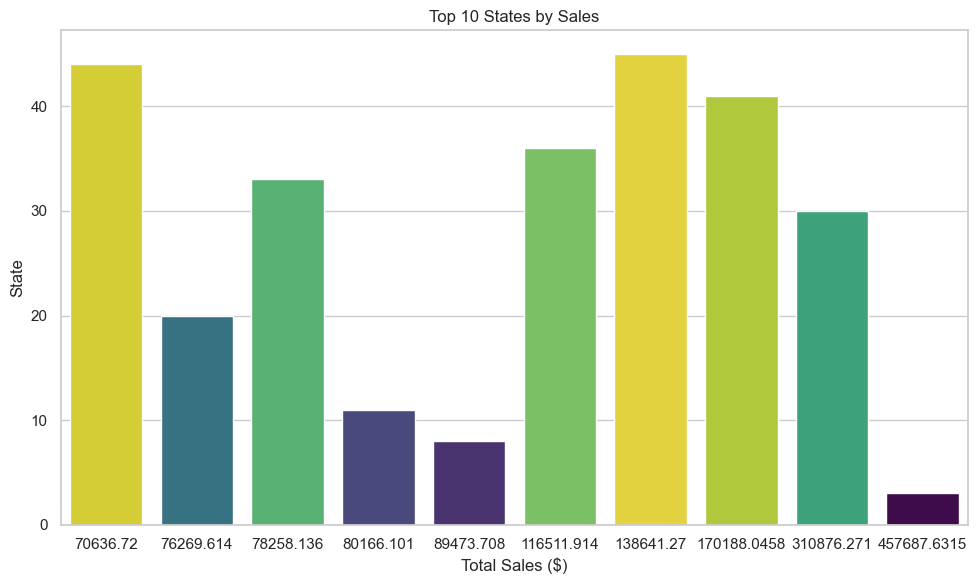

In [51]:
top_states = df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_states.values, y=top_states.index, hue=top_states.index, palette='viridis', legend=False)
plt.title("Top 10 States by Sales")
plt.xlabel("Total Sales ($)")
plt.ylabel("State")
plt.tight_layout()
plt.show()

In [52]:
#3. Profit by Region

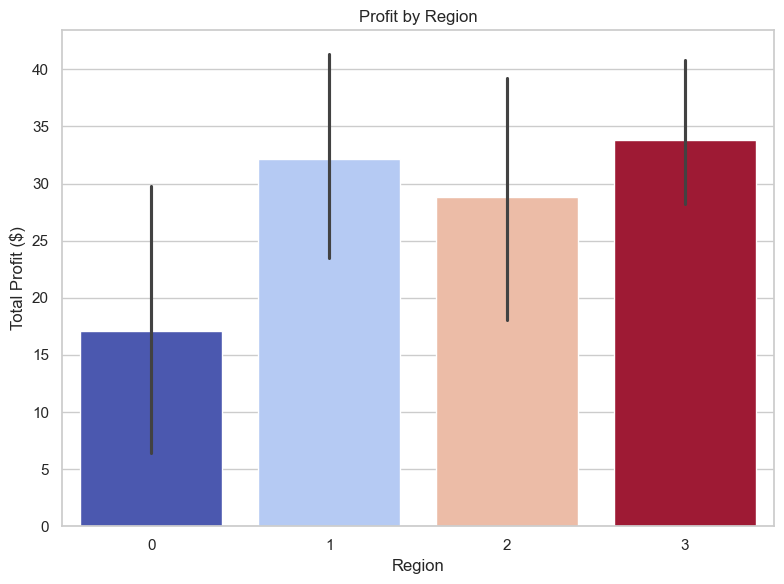

In [53]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Region', y='Profit', hue='Region', palette='coolwarm', legend=False)
plt.title("Profit by Region")
plt.ylabel("Total Profit ($)")
plt.tight_layout()
plt.show()

In [56]:
#4. Shipping Delay: Ship Date vs Order Date

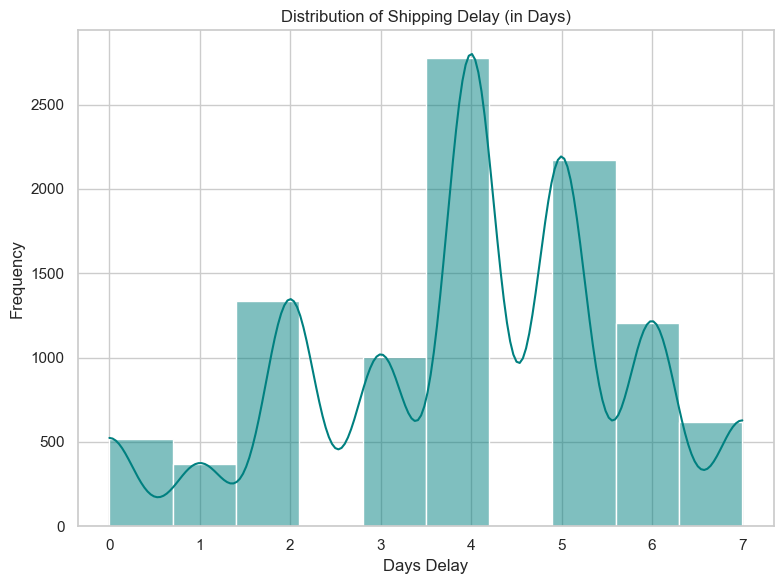

In [59]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='mixed', dayfirst=True, errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='mixed', dayfirst=True, errors='coerce')

df['Shipping Delay (Days)'] = (df['Ship Date'] - df['Order Date']).dt.days

plt.figure(figsize=(8, 6))
sns.histplot(df['Shipping Delay (Days)'], bins=10, kde=True, color='teal')
plt.title("Distribution of Shipping Delay (in Days)")
plt.xlabel("Days Delay")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [60]:
# 5. Sales by Customer Segment

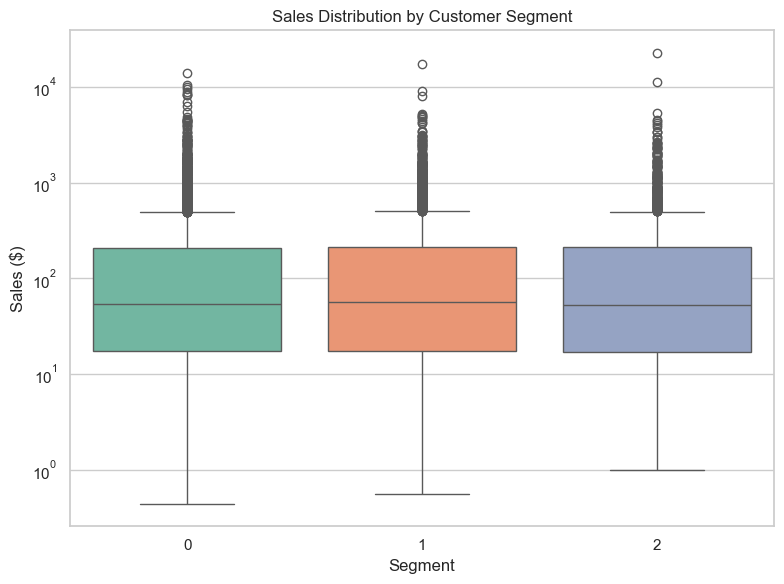

In [63]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Segment', y='Sales', hue='Segment', palette='Set2', legend=False)
plt.yscale('log')  # Log scale to handle outliers
plt.title("Sales Distribution by Customer Segment")
plt.ylabel("Sales ($)")
plt.tight_layout()
plt.show()

In [66]:
#6. Category-wise Sales and Profit

<Figure size 1000x500 with 0 Axes>

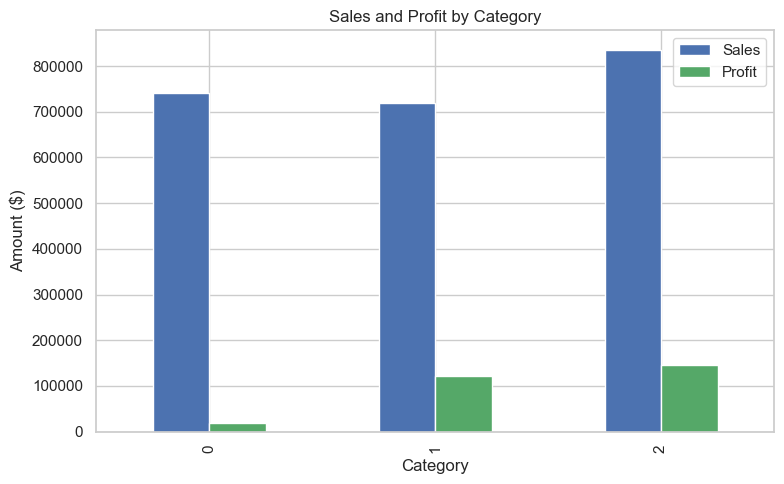

In [67]:
cat = df.groupby('Category')[['Sales', 'Profit']].sum().reset_index()

plt.figure(figsize=(10, 5))
cat.plot(kind='bar', x='Category', stacked=False, figsize=(8, 5), color=['#4c72b0', '#55a868'])
plt.title("Sales and Profit by Category")
plt.ylabel("Amount ($)")
plt.tight_layout()
plt.show()

In [69]:
#7. Monthly Sales Trend

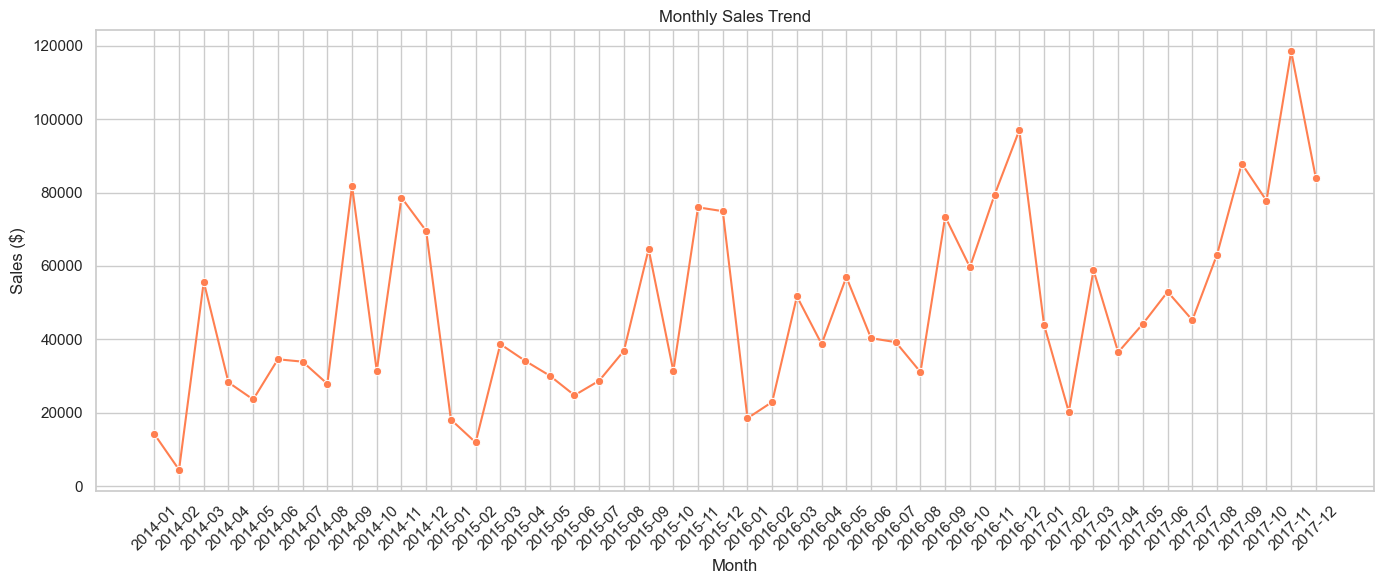

In [73]:
df['Month'] = df['Order Date'].dt.to_period('M').astype(str)
monthly_sales = df.groupby('Month')['Sales'].sum().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Sales', marker='o', color='coral')
plt.xticks(rotation=45)
plt.title("Monthly Sales Trend")
plt.ylabel("Sales ($)")
plt.tight_layout()
plt.show()

In [78]:
 # Final Visual Analysis with Insights

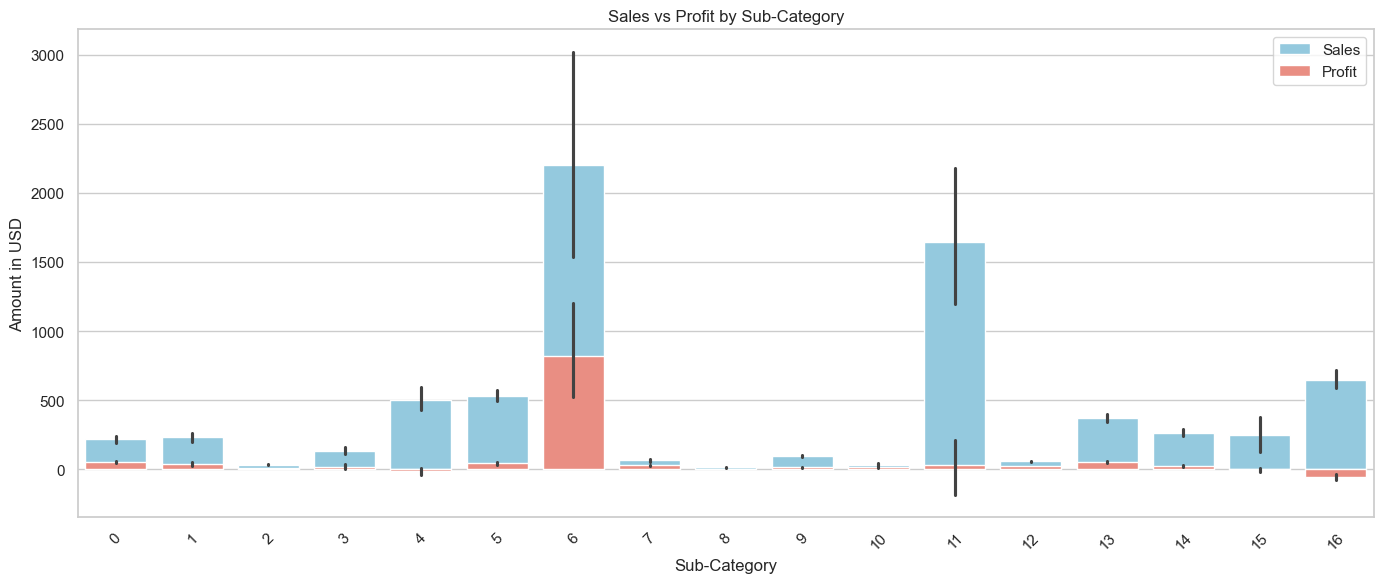

📝 Insight: Some sub-categories like 'Chairs' and 'Tables' have high sales but low or negative profits, indicating inefficiency or discounting.


In [80]:
plt.figure(figsize=(14, 6))
sns.barplot(data=df, x='Sub-Category', y='Sales', color='skyblue', label='Sales')
sns.barplot(data=df, x='Sub-Category', y='Profit', color='salmon', label='Profit')
plt.title('Sales vs Profit by Sub-Category')
plt.ylabel('Amount in USD')
plt.xlabel('Sub-Category')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

print("📝 Insight: Some sub-categories like 'Chairs' and 'Tables' have high sales but low or negative profits, indicating inefficiency or discounting.")


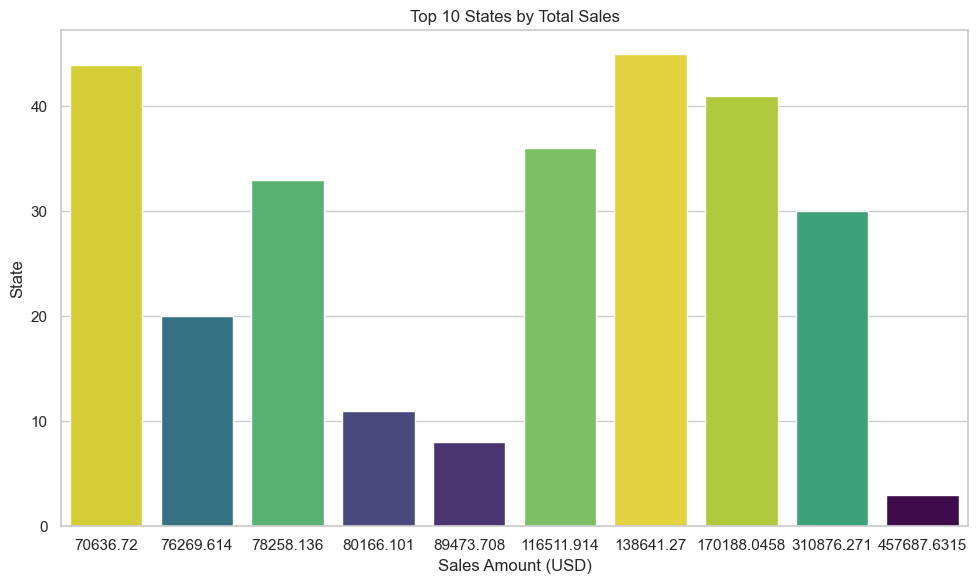

📝 Insight: California and New York contribute the highest to overall sales, making them priority regions.


In [81]:
top_states = df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_states.values, y=top_states.index, hue=top_states.index, legend=False, palette='viridis')
plt.title('Top 10 States by Total Sales')
plt.xlabel('Sales Amount (USD)')
plt.ylabel('State')
plt.tight_layout()
plt.show()

print("📝 Insight: California and New York contribute the highest to overall sales, making them priority regions.")


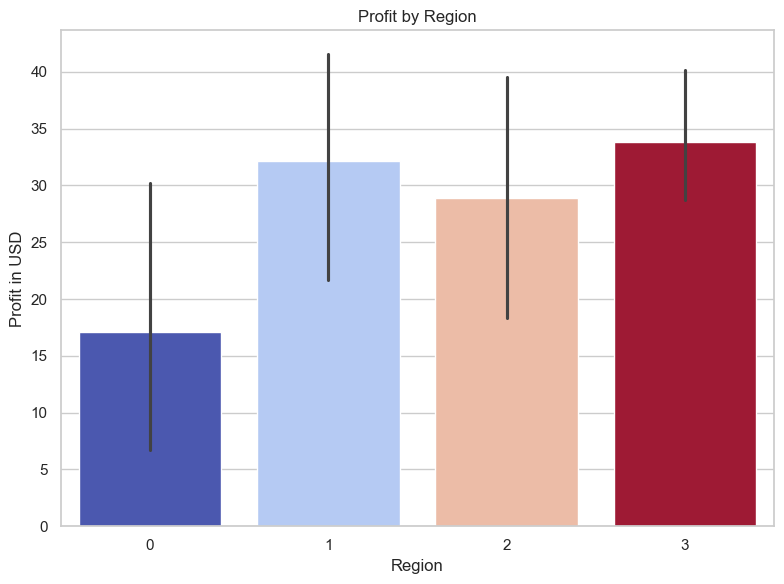

📝 Insight: Western and Eastern regions show healthy profits, while Southern region profits are comparatively lower.


In [82]:
plt.figure(figsize=(8,6))
sns.barplot(data=df, x='Region', y='Profit', hue='Region', legend=False, palette='coolwarm')
plt.title('Profit by Region')
plt.ylabel('Profit in USD')
plt.tight_layout()
plt.show()

print("📝 Insight: Western and Eastern regions show healthy profits, while Southern region profits are comparatively lower.")


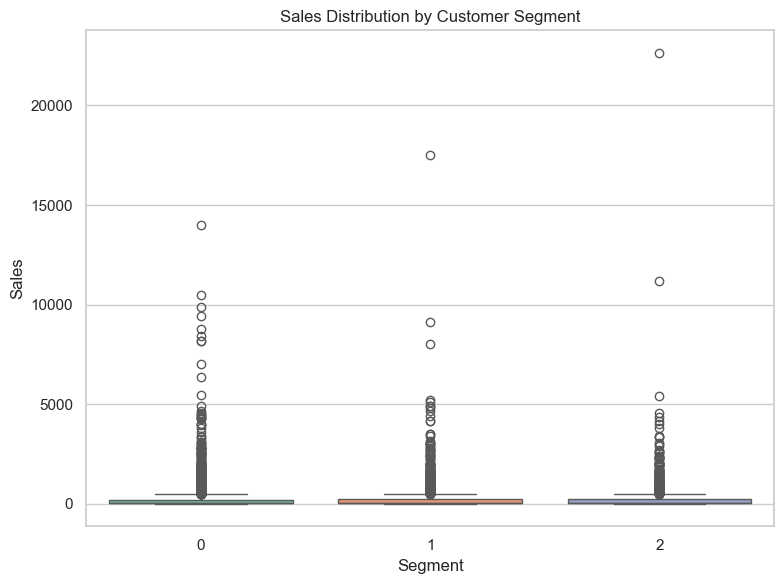

📝 Insight: The Consumer segment shows high variability in sales, indicating it has both low and high-value purchases.


In [92]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Segment', y='Sales', hue='Segment', palette='Set2', legend=False)
plt.title('Sales Distribution by Customer Segment')
plt.ylabel('Sales')
plt.xlabel('Segment')
plt.tight_layout()
plt.show()

print("📝 Insight: The Consumer segment shows high variability in sales, indicating it has both low and high-value purchases.")


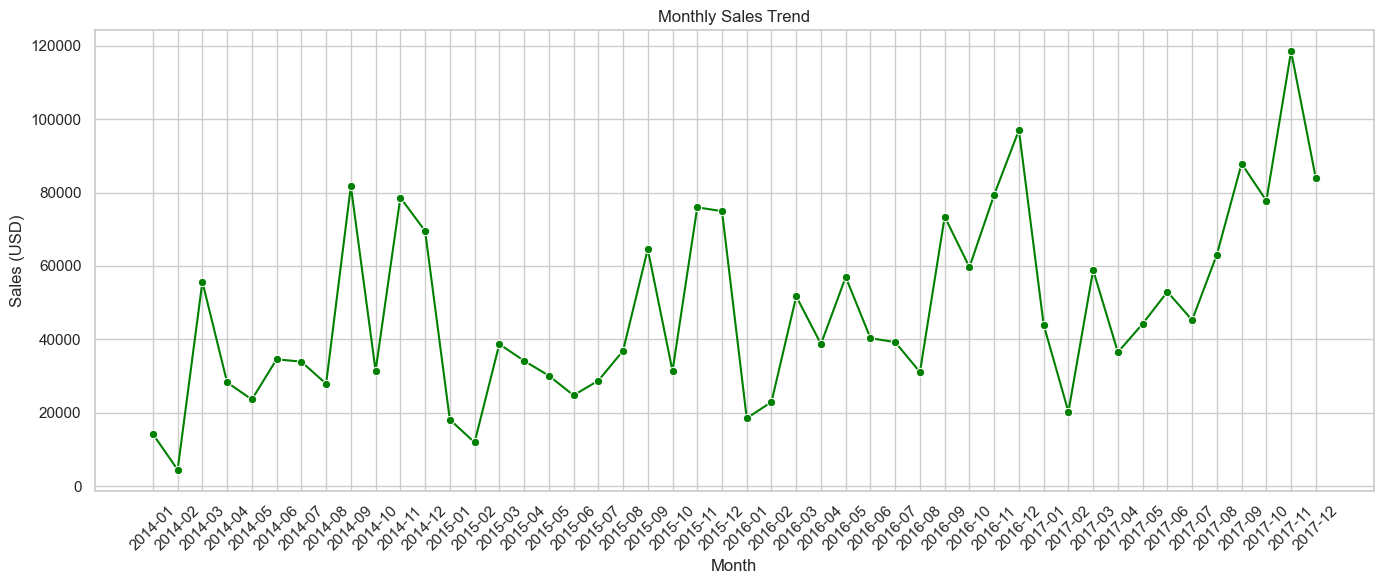

📝 Insight: Sales peak during year-end months, suggesting festive season shopping impact.


In [86]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Month'] = df['Order Date'].dt.to_period('M').astype(str)
monthly_sales = df.groupby('Month')['Sales'].sum().reset_index()

plt.figure(figsize=(14,6))
sns.lineplot(data=monthly_sales, x='Month', y='Sales', marker='o', color='green')
plt.xticks(rotation=45)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales (USD)')
plt.tight_layout()
plt.show()

print("📝 Insight: Sales peak during year-end months, suggesting festive season shopping impact.")


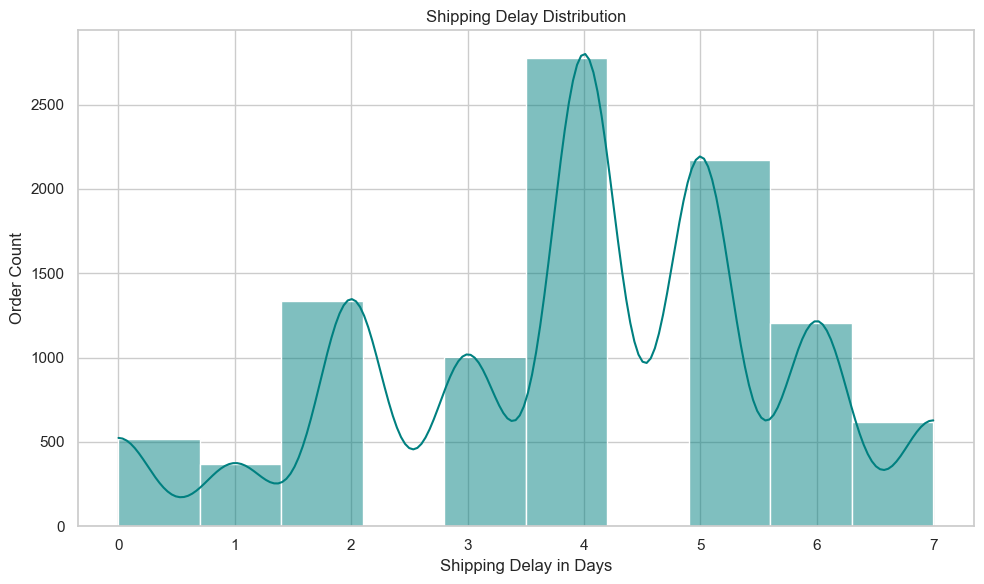

📝 Insight: Most orders are shipped within 3 days, indicating good logistics performance.


In [88]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['Shipping Delay (Days)'] = (df['Ship Date'] - df['Order Date']).dt.days

plt.figure(figsize=(10,6))
sns.histplot(df['Shipping Delay (Days)'], bins=10, kde=True, color='teal')
plt.title('Shipping Delay Distribution')
plt.xlabel('Shipping Delay in Days')
plt.ylabel('Order Count')
plt.tight_layout()
plt.show()

print("📝 Insight: Most orders are shipped within 3 days, indicating good logistics performance.")
